In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Read in the crypto data from the csv file

crypto_data = pd.read_csv(Path('crypto_data.csv'))

In [3]:
# Display the crypto data
crypto_data

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [6]:
# Use only currencies being traded and drop the'IsTrading' column
crypto_data_2nd = crypto_data[crypto_data['IsTrading'] == True]
crypto_data_2nd = crypto_data_2nd.drop('IsTrading', 1)
crypto_data_2nd

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Drop rows w/ null values
crypto_data_2nd = crypto_data_2nd.dropna()

In [8]:
# Display fixed data frame w/ no nulls
crypto_data_2nd

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
# Create dataframe with cryptocurrencies currently being mined
crypto_data_mined = crypto_data_2nd[crypto_data_2nd['TotalCoinsMined'] > 0]
crypto_data_mined

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [10]:
# Deleting columns with "CoinName"
crypto_data_mined = crypto_data_mined.drop('Unnamed: 0', 1)
crypto_data_mined = crypto_data_mined.drop('CoinName', 1)
crypto_data_mined

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [11]:
# Using one hot encoding (+ dummy variables) w/ categorical data to convert into numerical data 

crypto_dummies = pd.get_dummies(crypto_data_mined)
crypto_dummies

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Using StandardScaler to scale data

scaler = StandardScaler().fit(crypto_dummies)
crypto_data_scaled = scaler.transform(crypto_dummies)
crypto_data_scaled

array([[-0.11710817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

# Dimensionality Reduction

In [14]:
# Applying PCA to preserve 90% of the explained variance in dimensionality reduction

# Defining PCA
pca = PCA(n_components=.90)

# Two principal components of the scaled data.
crypto_pca = pca.fit_transform(crypto_data_scaled)
crypto_pca

array([[-2.67092248e-01, -1.16293969e-01, -4.88475859e-16, ...,
        -4.51748125e-01,  4.18909695e-01,  5.30185485e-01],
       [-2.49924699e-01, -1.17272732e-01, -7.66707688e-16, ...,
        -3.92658214e-01,  1.80444947e-01,  4.16399870e-01],
       [ 3.14746498e-01, -2.86187718e-03,  3.43063951e-15, ...,
         2.67196637e-01, -1.69680763e-01,  1.43911868e+00],
       ...,
       [-6.67192566e-02, -3.11211774e-01,  9.88267493e-15, ...,
         6.30965770e-01,  8.91802813e-01, -1.46545772e+00],
       [-2.90507995e-01, -2.45950491e-01,  7.06351445e-15, ...,
         9.51170213e-16,  8.00985443e-17, -4.48051232e-16],
       [-1.99343294e-01, -6.23600551e-02, -3.00001019e-15, ...,
        -1.34875936e-13,  4.21458515e-13,  1.97482961e-13]])

In [20]:
# Print out statements w/ the number of features with original scaled data and after conducting PCA.

print('The number of features of scaled data is',len(crypto_data_scaled[0]))
print('The number of features after PCA to preserve 90% of the explained variance in dimensionality reduction is',len(crypto_pca[0]))

The number of features of scaled data is 377
The number of features after PCA to preserve 90% of the explained variance in dimensionality reduction is 274


In [23]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=200)


In [25]:
# Reduce dimensions
crypto_tsne = crypto_pca
tsne_feature = tsne.fit_transform(crypto_tsne)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [26]:
tsne_feature.shape

(532, 2)

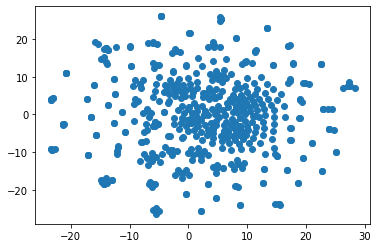

In [27]:
# We can make a visual graph of the clusters.
plt.scatter(tsne_feature[:,0], tsne_feature[:,1])
plt.show()

In [28]:
# Thoughts on the T-SNE clustering:

# It looks like there is clustering between O and 10 on the X axis and -10 to 10 on the Y axis, but overall it's very spread out elsewhere.
# There appear to be many outliers to the point where there's a core cluster and a variety of data points elsewhere.


# Cluster Analysis with k-Means

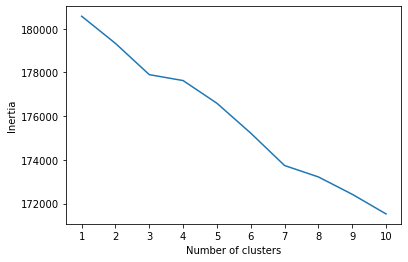

In [32]:
inertia = []

# K range is 1 to 11

k = [1,2,3,4,5,6,7,8,9,10]


# for-loop to determine the inertia for each k between 1 through 10
for i in k:
    k_means = KMeans(n_clusters = i, random_state = 5)
    k_means.fit(crypto_pca)
    inertia.append(k_means.inertia_)

# Create Dataframe for elbow curve
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

plt.plot(elbow_df['k'], elbow_df['inertia'])

plt.xticks(range(1,11))

plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Recommendations

# Through the clustering analysis with T-SNE and the K-Means Analysis,
# it does not seem like there is any clear elbow in the curve. It also
# does not look like there is any useful clusterig of the cryptocurrencies 
# as demonstrated by the cluster graph and the original scatter plot.
# It does not seem like there's any useful form of grouping for cryptocurrencies.